In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Walmart_Store_Sales.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
#Convert to datetime
df['Date']= pd.to_datetime(df['Date'])

In [4]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [5]:
df.shape

(6435, 8)

In [6]:
df.size

51480

In [7]:
# A concise summery of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [8]:
# checking missing values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [9]:
# Getting a descriptive statistics summery
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [10]:
# Analysis task
# Task 1 : Which Store has maximum sales
MaxSale = df.groupby("Store")["Weekly_Sales"].sum().reset_index(name="Total_Sale").sort_values(by="Total_Sale", ascending=False)
MaxSale.head()

,Store,Total_Sale
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08


In [11]:
# Store 20 has maximum sale value.

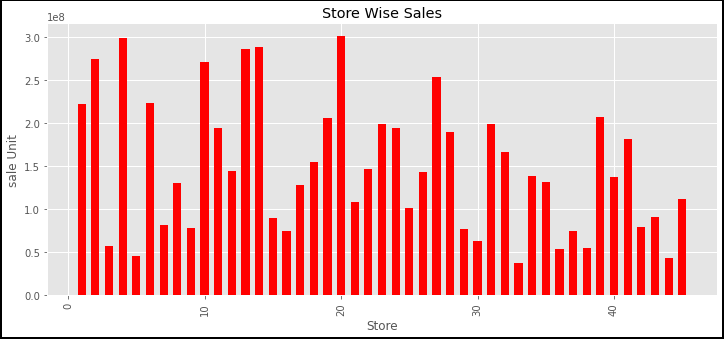

In [13]:
# Plotting Maximum sale
plt.figure(figsize=(12,5),edgecolor="black",linewidth=4)
plt.bar(MaxSale['Store'],MaxSale['Total_Sale'],color='red',width=0.6)
plt.xlabel("Store")
plt.ylabel("sale Unit")
plt.title("Store Wise Sales")
plt.xticks(rotation=90)
plt.grid(True,linewidth=1)
plt.style.use('ggplot')
plt.show()

In [13]:
# From graph also we observe store 20 has maximim sale.

In [14]:
# Task 2 : Which store has maximum standard deviation i.e., the sale vary a lot. Also,find out the coefficient of mean to standard deviation.
 


In [14]:
MaxStd = df.groupby("Store")["Weekly_Sales"].std().reset_index(name="Standard Deviation").sort_values(by='Standard Deviation', ascending=False)
MaxStd['Standard Deviation']=MaxStd['Standard Deviation'].round(2)
MaxStd.head()

,Store,Standard Deviation
13,14,317569.95
9,10,302262.06
19,20,275900.56
3,4,266201.44
12,13,265507.00


In [15]:
# Store 14 has maximum standard deviation.
## Plotting Standard Deviation

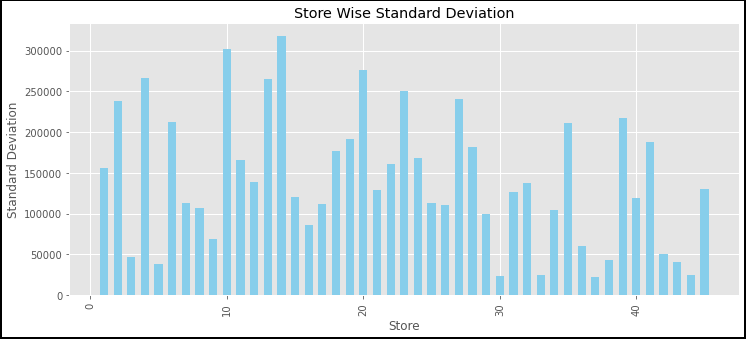

In [17]:
plt.figure(figsize=(12,5),edgecolor='black',linewidth=4)
plt.bar(MaxStd['Store'], MaxStd['Standard Deviation'], color='skyblue', width=0.6)
plt.xlabel("Store")
plt.ylabel("Standard Deviation")
plt.title("Store Wise Standard Deviation")
plt.xticks(rotation=90)
plt.grid(True,linewidth=1)
plt.style.use('ggplot')
plt.show()

In [18]:
## From graph also we observe that store 14 has maximum standard deviation.

In [19]:
# Find out the coefficient of mean to standard deviation

In [20]:
MaxCoef = df.groupby("Store")["Weekly_Sales"].sum().reset_index(name="Total_Sale").sort_values(by='Total_Sale', ascending=False)
CoefVar = lambda x: np.std(MaxCoef['Total_Sale'], ddof=1) / np.mean(MaxCoef['Total_Sale']) * 100
CoefVal = CoefVar(MaxCoef['Total_Sale']) 
CoefVal

52.2105641644127

In [21]:
# The Coefficient of Mean to Standard Deviation is 52.21.

In [22]:
# Tak 3 : Which store/s has good quarterly growth rate in Q3'2012
## Creating Day,Month,Year variable from Date Variable

In [23]:
import calendar
df['year']= df['Date'].dt.year
df['month']= df['Date'].dt.month
df['day']= df['Date'].dt.day
df['MonthName']= df['month'].apply(lambda x: calendar.month_name[x])
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,MonthName
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,May
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,December
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,February
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,February
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,May


In [24]:
# New DataSet for 2012 Data

In [25]:
SaleData2012 = df[df['year']==2012]
SaleData2012.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,MonthName
100,1,2012-06-01,1550369.92,0,49.01,3.157,219.714258,7.348,2012,6,1,June
101,1,2012-01-13,1459601.17,0,48.53,3.261,219.892526,7.348,2012,1,13,January
102,1,2012-01-20,1394393.84,0,54.11,3.268,219.985689,7.348,2012,1,20,January
103,1,2012-01-27,1319325.59,0,54.26,3.290,220.078852,7.348,2012,1,27,January
104,1,2012-03-02,1636339.65,0,56.55,3.360,220.172015,7.348,2012,3,2,March


In [26]:
# Creating new Variable Quarter for Growth Rate Calculation.

In [27]:
def calqtr(x):
    if x['month']==1 or x['month']==2 or x['month']==3: return 1
    elif x['month']==4 or x['month']==5 or x['month']==6: return 2
    elif x['month']==7 or x['month']==8 or x['month']==9: return 3
    else: return 4
    
SaleData2012Qtr = SaleData2012.copy()
SaleData2012Qtr['Qtr'] = SaleData2012.apply(calqtr, axis=1)
SaleData2012Qtr.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,MonthName,Qtr
100,1,2012-06-01,1550369.92,0,49.01,3.157,219.714258,7.348,2012,6,1,June,2
101,1,2012-01-13,1459601.17,0,48.53,3.261,219.892526,7.348,2012,1,13,January,1
102,1,2012-01-20,1394393.84,0,54.11,3.268,219.985689,7.348,2012,1,20,January,1
103,1,2012-01-27,1319325.59,0,54.26,3.290,220.078852,7.348,2012,1,27,January,1
104,1,2012-03-02,1636339.65,0,56.55,3.360,220.172015,7.348,2012,3,2,March,1


In [28]:
QtrSales = SaleData2012Qtr.groupby(["Store",'Qtr'])["Weekly_Sales"].sum().reset_index(name="Qtr_Sale").sort_values(by='Store')
QtrSale1 = pd.DataFrame(QtrSales)
QtrSale1.head()

,Store,Qtr,Qtr_Sale
0,1,1,18951097.69
1,1,2,21036965.58
2,1,3,18633209.98
3,1,4,9580784.77
4,2,1,22543946.63


In [29]:
## Calculating Growth Rate.
# Growth Rate Calculation Formula 
# Absolute Change = New value - Original value
# (Growth Rate = Absolute Change / Or iginal value)
# (Percent Change = Growth Rate * 100)

In [30]:
SaleDataQ2 = QtrSale1[QtrSale1['Qtr'].isin([2,3])].sort_values(by='Qtr_Sale',ascending=False)
GrowthRate = SaleDataQ2.pivot(index='Store', columns='Qtr', values='Qtr_Sale').reset_index()
GrowthRateF = pd.DataFrame(GrowthRate)
GrowthRateF['GrowthRate'] = ((GrowthRateF.iloc[:,2]-GrowthRateF.iloc[:,1])/GrowthRateF.iloc[:,1]*100).round(2)
GrowthRateF = GrowthRateF.sort_values(by='GrowthRate', ascending=False)
GrowthRateF.head()

Qtr,Store,2,3,GrowthRate
15,16,6626133.44,6441311.11,-2.79
6,7,7613593.92,7322393.92,-3.82
34,35,10753570.97,10252122.68,-4.66
25,26,13218289.66,12417575.35,-6.06
38,39,20191585.63,18899955.17,-6.40


In [31]:
# Plotting 3rd Quarter Growth Rate

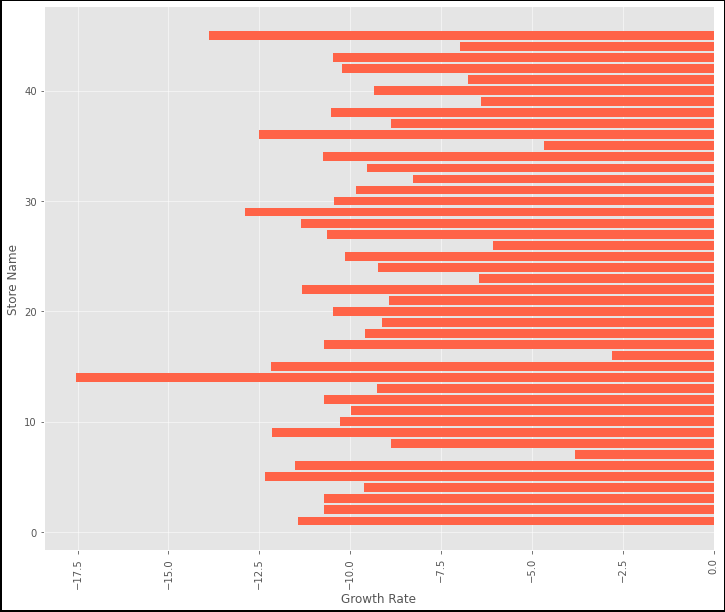

In [32]:
plt.figure(figsize=(12,10),edgecolor='black', linewidth=4)
plt.barh(GrowthRateF['Store'][GrowthRateF['GrowthRate'] < 0],GrowthRateF['GrowthRate'][GrowthRateF['GrowthRate'] < 0], color='tomato')
plt.barh(GrowthRateF['Store'][GrowthRateF['GrowthRate'] > 0],GrowthRateF['GrowthRate'][GrowthRateF['GrowthRate'] > 0], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel("Growth Rate")
plt.ylabel("Store Name")
plt.axvline(0, color='grey', lw=0.5) 
plt.grid(True , linewidth=0.5)
plt.show()

In [33]:
# Store 16 has maximum Growth rate

# Task 4 : Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in nonholiday season for all stores together  

In [34]:
HolidaySale = df.copy()
HolidaySale = HolidaySale[HolidaySale['Holiday_Flag']==1]
HolidaySale.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,MonthName
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,December
31,1,2010-10-09,1507460.69,1,78.69,2.565,211.495190,7.787,2010,10,9,October
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,2010,11,26,November
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,2010,12,31,December
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742,2011,11,2,November


In [35]:
# Creating Holiday variable

In [36]:
def holiday(x):
    if x['day'] in [8,10,11,12] and x['MonthName']=='February': return "Super Bowl Day"
    elif x['day'] in [6,7,9,10] and x['MonthName']=='September': return "Labour Day"
    elif x['day'] in [23,25,26,29] and x['MonthName']=='November': return "ThanksGiving Day"
    elif x['day'] in [27,28,30,31] and x['MonthName']=='December': return "Christmas Day"
    else: return None

HolidaySale['HolidayName'] = HolidaySale.apply(holiday, axis=1)
HolidaySale

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,MonthName,HolidayName
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,December,None
31,1,2010-10-09,1507460.69,1,78.69,2.565,211.495190,7.787,2010,10,9,October,None
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,2010,11,26,November,ThanksGiving Day
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,2010,12,31,December,Christmas Day
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742,2011,11,2,November,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6375,45,2011-09-09,746129.56,1,71.48,3.738,186.673738,8.625,2011,9,9,September,Labour Day
6386,45,2011-11-25,1170672.94,1,48.71,3.492,188.350400,8.523,2011,11,25,November,ThanksGiving Day
6391,45,2011-12-30,869403.63,1,37.79,3.389,189.062016,8.523,2011,12,30,December,Christmas Day
6397,45,2012-10-02,803657.12,1,37.00,3.640,189.707605,8.424,2012,10,2,October,None


In [37]:
NonHolidaySale = df.copy()
NonHolidaySale = NonHolidaySale[NonHolidaySale['Holiday_Flag']==0]
NonHolidaySale.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,MonthName
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,May
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,February
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,February
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,May
5,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106,2010,12,3,December


In [38]:
# Non Holiday Session Mean value.

In [39]:
NonHolidayMean = NonHolidaySale.groupby("Store")["Weekly_Sales"].mean().reset_index(name="Average Sale").sort_values(by='Average Sale', ascending=False)
NonHolidayMean['Average Sale'] = NonHolidayMean['Average Sale'].round(2)
NonHolidayMean = pd.DataFrame(NonHolidayMean)
NonHolidayMean = NonHolidayMean.reset_index(drop=True)
NonHolidayMean.head()

,Store,Average Sale
0,20,2097048.43
1,4,2083555.84
2,14,2013489.33
3,13,1995392.98
4,2,1914208.81


In [40]:
# Mapping non holiday Mean value in holiday sale data.

In [41]:
meandict = NonHolidayMean.set_index('Store')['Average Sale'].to_dict()
HolidaySale['NonHolidayAvgSale'] = HolidaySale['Store'].map(meandict)
HolidaySale.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,MonthName,HolidayName,NonHolidayAvgSale
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,December,None,1546957.39
31,1,2010-10-09,1507460.69,1,78.69,2.565,211.495190,7.787,2010,10,9,October,None,1546957.39
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,2010,11,26,November,ThanksGiving Day,1546957.39
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,2010,12,31,December,Christmas Day,1546957.39
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742,2011,11,2,November,None,1546957.39


In [42]:
# Feching holiday which has high sales than non holiday session.

In [43]:
HighSale = HolidaySale.query('Weekly_Sales > NonHolidayAvgSale')
HighSale.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,MonthName,HolidayName,NonHolidayAvgSale
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,December,None,1546957.39
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,2010,11,26,November,ThanksGiving Day,1546957.39
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742,2011,11,2,November,None,1546957.39
94,1,2011-11-25,2033320.66,1,60.14,3.236,218.467621,7.866,2011,11,25,November,ThanksGiving Day,1546957.39
105,1,2012-10-02,1802477.43,1,48.02,3.409,220.265178,7.348,2012,10,2,October,None,1546957.39


In [44]:
# Plotting holiday with higher sale than non holiday mean sale.

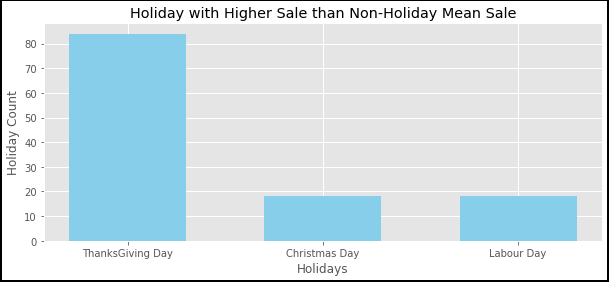

In [45]:
Holiday = HighSale['HolidayName'].value_counts()
Holiday = pd.DataFrame(Holiday).reset_index()
plt.figure(figsize=(10,4),edgecolor='black',linewidth=4)
plt.bar(Holiday['index'], Holiday['HolidayName'], color='skyblue', width=0.6)
plt.xlabel("Holidays")
plt.ylabel("Holiday Count")
plt.title("Holiday with Higher Sale than Non-Holiday Mean Sale")
plt.grid(True,linewidth=1)
plt.style.use('ggplot')
plt.show()

In [46]:
## Task 5: Provide a monthly and semester view of sales units and give insights
# Monthly Sale of all Store

In [47]:
MonthlySale = df.groupby("MonthName")["Weekly_Sales"].sum().reset_index(name="Total_Sale").sort_values(by='Total_Sale', ascending=False)
MonthlySale['Total_Sale'] = MonthlySale['Total_Sale'].round(2)
MonthlySale.head()

,MonthName,Total_Sale
0,April,6.453239e+08
8,May,6.056966e+08
10,October,6.029189e+08
2,December,5.990761e+08
5,July,5.933139e+08


In [48]:
# plotting Monthly Sale of all years

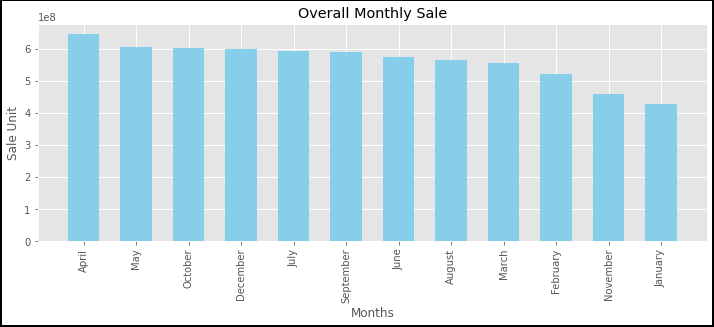

In [49]:
plt.figure(figsize=(12,4),edgecolor='black',linewidth=4)
plt.bar(MonthlySale['MonthName'], MonthlySale['Total_Sale'], color='skyblue', width=0.6)
plt.xlabel("Months")
plt.ylabel("Sale Unit")
plt.title("Overall Monthly Sale")
plt.xticks(rotation=90)
plt.grid(True,linewidth=1)
plt.style.use('ggplot')
plt.show()

In [50]:
# Year Wise Monthly Sale = 2010

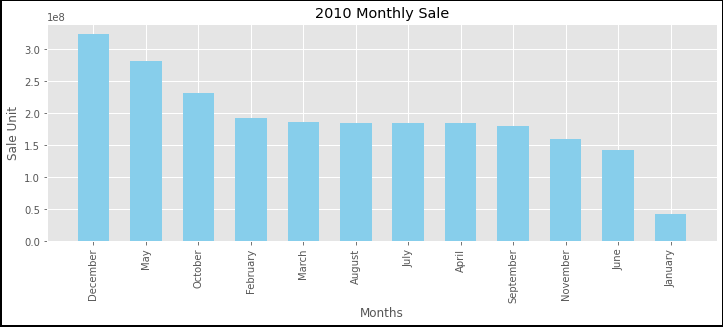

In [51]:
Sale2010 = df[df['year']==2010].groupby("MonthName")["Weekly_Sales"].sum().reset_index(name="Total_Sale").sort_values(by='Total_Sale', ascending=False)
Sale2010['Total_Sale']=Sale2010['Total_Sale'].round(2)
plt.figure(figsize=(12,4),edgecolor='black',linewidth=4)
plt.bar(Sale2010['MonthName'], Sale2010['Total_Sale'], color='skyblue', width=0.6)
plt.xlabel("Months")
plt.ylabel("Sale Unit")
plt.title("2010 Monthly Sale")
plt.xticks(rotation=90)
plt.grid(True,linewidth=1)
plt.style.use('ggplot')
plt.show()

In [52]:
#  Year Wise Monthly Sale = 2011

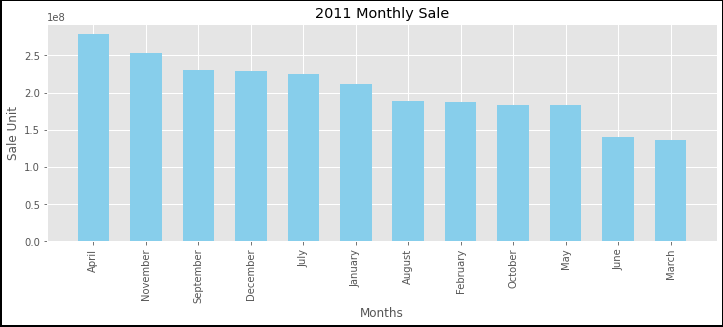

In [53]:
Sale2011 = df[df['year']==2011].groupby("MonthName")["Weekly_Sales"].sum().reset_index(name="Total_Sale").sort_values(by='Total_Sale', ascending=False)
Sale2010['Total_Sale']=Sale2010['Total_Sale'].round(2)
plt.figure(figsize=(12,4),edgecolor='black',linewidth=4)
plt.bar(Sale2011['MonthName'], Sale2011['Total_Sale'], color='skyblue', width=0.6)
plt.xlabel("Months")
plt.ylabel("Sale Unit")
plt.title("2011 Monthly Sale")
plt.xticks(rotation=90)
plt.grid(True,linewidth=1)
plt.style.use('ggplot')
plt.show()

In [54]:
# Year Wise Monthly Sale = 2012

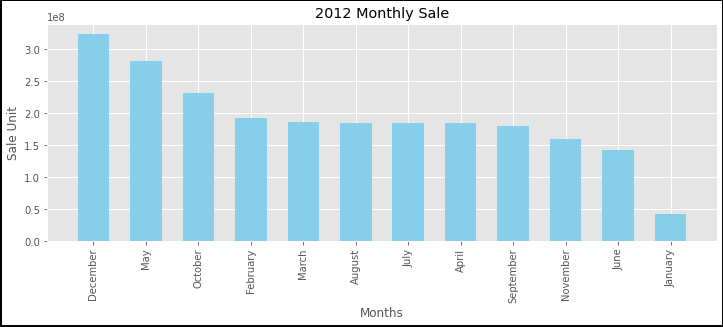

In [55]:
Sale2012 = df[df['year']==2012].groupby("MonthName")["Weekly_Sales"].sum().reset_index(name="Total_Sale").sort_values(by='Total_Sale', ascending=False)
Sale2010['Total_Sale']=Sale2010['Total_Sale'].round(2)
plt.figure(figsize=(12,4),edgecolor='black',linewidth=4)
plt.bar(Sale2010['MonthName'], Sale2010['Total_Sale'], color='skyblue', width=0.6)
plt.xlabel("Months")
plt.ylabel("Sale Unit")
plt.title("2012 Monthly Sale")
plt.xticks(rotation=90)
plt.grid(True,linewidth=1)
plt.style.use('ggplot')
plt.show()

In [56]:
# Plotting yearly Sale

In [57]:
YearlySale = df.groupby("year")["Weekly_Sales"].sum().reset_index(name="Total_Sale").sort_values(by='Total_Sale', ascending=False)
YearlySale['Total_Sale']=YearlySale['Total_Sale'].round(2)
YearlySale['year']=YearlySale['year'].astype(str)
YearlySale.head()

,year,Total_Sale
1,2011,2.448200e+09
0,2010,2.288886e+09
2,2012,2.000133e+09


In [58]:
# Plotting Year Sale

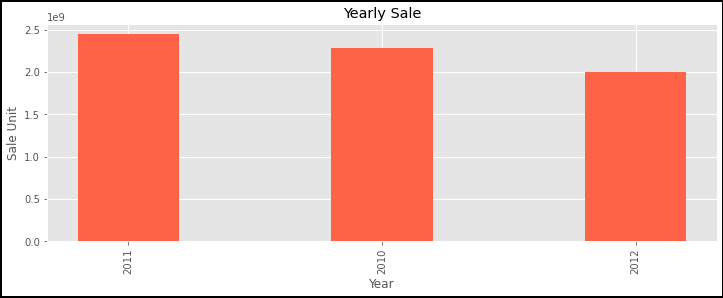

In [59]:
plt.figure(figsize=(12,4),edgecolor='black',linewidth=4)
plt.bar(YearlySale['year'], YearlySale['Total_Sale'], color='tomato', width=0.4)
plt.xlabel("Year")
plt.ylabel("Sale Unit")
plt.title("Yearly Sale")
plt.xticks(rotation=90)
plt.grid(True,linewidth=1)
plt.style.use('ggplot')
plt.show()

In [60]:
# Statistical Task
## For Store 1 - Build prediction models to forcast demand

In [61]:
from sklearn.preprocessing import LabelEncoder
LabEncoder = LabelEncoder()
Store1Data = df[df['Store']==1]
Store1Data = Store1Data.copy()
Store1Data['Date_New'] = LabEncoder.fit_transform(Store1Data['Date'])
Store1Data.drop(['Store','Date','Holiday_Flag','year','month','day','MonthName'], axis=1, inplace=True)
Store1Data.head()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Date_New
0,1643690.90,42.31,2.572,211.096358,8.106,13
1,1641957.44,38.51,2.548,211.242170,8.106,42
2,1611968.17,39.93,2.514,211.289143,8.106,3
3,1409727.59,46.63,2.561,211.319643,8.106,4
4,1554806.68,46.50,2.625,211.350143,8.106,14


In [62]:
# Correlation Matrix of variable

In [63]:
Corrmatrix = Store1Data.corr()
print("Correlation matrix is : ")
print(Corrmatrix)

Correlation matrix is : 
              Weekly_Sales  Temperature  Fuel_Price       CPI  Unemployment  \
Weekly_Sales      1.000000    -0.222701    0.124592  0.225408     -0.097955   
Temperature      -0.222701     1.000000    0.228493  0.118503     -0.180695   
Fuel_Price        0.124592     0.228493    1.000000  0.755259     -0.513944   
CPI               0.225408     0.118503    0.755259  1.000000     -0.813471   
Unemployment     -0.097955    -0.180695   -0.513944 -0.813471      1.000000   
Date_New          0.217580     0.092154    0.774288  0.943272     -0.771032   

              Date_New  
Weekly_Sales  0.217580  
Temperature   0.092154  
Fuel_Price    0.774288  
CPI           0.943272  
Unemployment -0.771032  
Date_New      1.000000  


In [64]:
# Heatmap of Variables

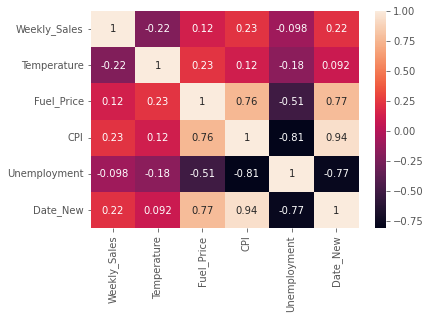

In [65]:
import seaborn as sns
ax = sns.heatmap(Store1Data.corr(), annot=True)

In [66]:
# Looking Heatmap and Correlation table, Date, CPI, FuelPrice have correlation to Weekly Sales but all this have multi colinearity, so we will build the model on Date variable.

In [67]:
LRModelData = Store1Data[['Weekly_Sales', 'Date_New']]
LRModelData.shape

(143, 2)

In [68]:
# Creating Train Test Data.

In [69]:
from sklearn.model_selection import train_test_split
T = LRModelData.drop("Weekly_Sales", axis=1)
X = np.array(T).reshape((-1,1))
Y = LRModelData["Weekly_Sales"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2, random_state = 21)

In [70]:
print("Shape of X_train is " , X_train.shape)
print("Shape of Y_train is " , Y_train.shape)
print("===========================================")
print("Shape of X_test is " , X_test.shape)
print("Shape of Y_test is " , Y_test.shape)

Shape of X_train is  (114, 1)
Shape of Y_train is  (114,)
Shape of X_test is  (29, 1)
Shape of Y_test is  (29,)


In [71]:
from sklearn.linear_model import LinearRegression
LRModel = LinearRegression()
LRModel.fit(X_train, Y_train)

LinearRegression()

In [72]:
## Prediction
ypred = LRModel.predict(X_test)
ypred = ypred.round(2)
ypred

array([1574778.11, 1581997.61, 1503385.28, 1571569.45, 1512209.11,
       1529856.78, 1513813.45, 1610073.45, 1535471.95, 1607666.95,
       1513011.28, 1498572.28, 1565152.11, 1576382.45, 1586810.61,
       1551515.28, 1515417.78, 1547504.45, 1582799.78, 1526648.11,
       1545097.95, 1602853.95, 1536274.11, 1532263.28, 1606062.61,
       1558734.78, 1509802.61, 1606864.78, 1533065.45])

In [73]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("The RMSE value of the LR model on the test data is ",np.sqrt(mean_squared_error(Y_test, ypred)))
print("The MAE value of the LR model on the test data is", mean_absolute_error(Y_test, ypred))

The RMSE value of the LR model on the test data is  150586.99481263765
The MAE value of the LR model on the test data is 105695.93275862072


In [74]:
ActPred = pd.DataFrame({"Actual Sale" : Y_test, "Predicted Sales": ypred})
ActPred.head()

,Actual Sale,Predicted Sales
97,1881176.67,1574778.11
107,1539387.83,1581997.61
7,1404429.92,1503385.28
92,1594938.89,1571569.45
26,1605491.78,1512209.11


In [75]:
## Plotting the Value.

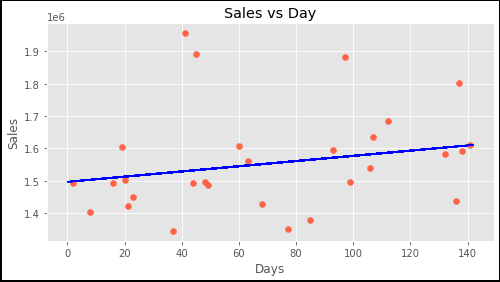

In [76]:
plt.figure(figsize=(8,4),edgecolor='black', linewidth=4)
plt.scatter(X_test, Y_test, color='tomato')
plt.plot(X_train, LRModel.predict(X_train), color='blue')
plt.title("Sales vs Day")
plt.xlabel("Days")
plt.ylabel("Sales")
plt.style.use('ggplot')
plt.show()

In [77]:
## Project Completed ##